# Breast Cancer

## Load Data

In [ ]:
!pip install kaggle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os

# CHANGE BOTH THE USERNAME AND KEY TO YOUR

# Replace 'your_kaggle_username' and 'your_kaggle_key' with your actual Kaggle API username and key from kaggle.json
os.environ['KAGGLE_USERNAME'] = 'kaitlyn12345'
os.environ['KAGGLE_KEY'] = 'bafc887b9095b950ad5962493419c6d1'

!kaggle datasets download -d awsaf49/cbis-ddsm-breast-cancer-image-dataset


cbis-ddsm-breast-cancer-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:

# Unzip the downloaded folder
!unzip -o /content/cbis-ddsm-breast-cancer-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295326067813319071803507885093865003464/1-076.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295334798611650724727702371150477767947/1-265.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295334798611650724727702371150477767947/2-266.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162/1-067.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295394441612082321922200964343746626621/1-002.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295397487412067903910787953980192002590/1-233.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295400289412664594307776853882592114725/1-294.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295400289412664594307776853882592114725/2-223.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295438974411063274614777547962485322182/1-013.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295438974411063274614777547962485322182/2-012.jpg  

In [ ]:
# Read meta.csv
meta = pd.read_csv("/content/csv/meta.csv")
meta.head(10)

,SeriesInstanceUID,StudyInstanceUID,Modality,SeriesDescription,BodyPartExamined,SeriesNumber,Collection,Visibility,ImageCount
0,1.3.6.1.4.1.9590.100.1.2.117041576511324414842...,1.3.6.1.4.1.9590.100.1.2.229361142710768138411...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
1,1.3.6.1.4.1.9590.100.1.2.438738396107617880132...,1.3.6.1.4.1.9590.100.1.2.195593486612988388325...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
2,1.3.6.1.4.1.9590.100.1.2.767416741131676463382...,1.3.6.1.4.1.9590.100.1.2.257901172612530623323...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
3,1.3.6.1.4.1.9590.100.1.2.296931352612305599800...,1.3.6.1.4.1.9590.100.1.2.109468616710242115222...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
4,1.3.6.1.4.1.9590.100.1.2.436657670120353100077...,1.3.6.1.4.1.9590.100.1.2.380627129513562450304...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
5,1.3.6.1.4.1.9590.100.1.2.245633900110007082034...,1.3.6.1.4.1.9590.100.1.2.143790815011189157220...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
6,1.3.6.1.4.1.9590.100.1.2.451316277131445824242...,1.3.6.1.4.1.9590.100.1.2.310228111811303452111...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
7,1.3.6.1.4.1.9590.100.1.2.321062807811123845106...,1.3.6.1.4.1.9590.100.1.2.195655760513031195523...,MG,cropped images,BREAST,1,CBIS-DDSM,1,1
8,1.3.6.1.4.1.9590.100.1.2.203989029910964209440...,1.3.6.1.4.1.9590.100.1.2.222512969612930058132...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,1
9,1.3.6.1.4.1.9590.100.1.2.593316452127229649195...,1.3.6.1.4.1.9590.100.1.2.407538725111828839342...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2


In [ ]:
dicom = pd.read_csv("/content/csv/dicom_info.csv")
dicom.head(10)

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN
5,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.15333...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...,NaN,8,8,BREAST,1981,20160503,111620.055,WSD,...,MATLAB,ROI mask images,1.3.6.1.4.1.9590.100.1.2.153339052913121382622...,1,0,ISO_IR 100,20170906.0,DDSM,1.3.6.1.4.1.9590.100.1.2.157384031212566921514...,82702.0
6,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.15333...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...,NaN,16,16,BREAST,393,20160503,111620.055,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.153339052913121382622...,1,44323,ISO_IR 100,20170830.0,DDSM,1.3.6.1.4.1.9590.100.1.2.157384031212566921514...,215032.0
7,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.17899...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...,NaN,16,16,BREAST,611,20160503,122938.838,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.178994714611485132105...,1,24057,ISO_IR 100,20170830.0,DDSM,1.3.6.1.4.1.9590.100.1.2.250103550412831547020...,215300.0
8,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.17899...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...,NaN,8,8,BREAST,3571,20160503,122938.838,WSD,...,MATLAB,ROI mask images,1.3.6.1.4.1.9590.100.1.2.178994714611485132105...,1,0,ISO_IR 100,20170906.0,DDSM,1.3.6.1.4.1.9590.100.1.2.250103550412831547020...,84849.0
9,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.41183...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...,NaN,8,8,BREAST,2371,20160503,131321.302,WSD,...,MATLAB,ROI mask images,1.3.6.1.4.1.9590.100.1.2.411833492612373627114...,1,0,ISO_IR 100,20170906.0,DDSM,1.3.6.1.4.1.9590.100.1.2.407544576612957992910...,90204.0


In [ ]:
calcCaseTrain = pd.read_csv("/content/csv/calc_case_description_train_set.csv")
calcCaseTrain.head(10)

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...
5,P_00008,1,LEFT,CC,2,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_2/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_2/1.3.6.1.4.1.95...
6,P_00008,1,LEFT,CC,3,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_3/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_3/1.3.6.1.4.1.95...
7,P_00008,1,LEFT,MLO,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00008_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00008_LEFT_MLO_1/1.3.6.1.4.1.9...
8,P_00008,1,LEFT,MLO,2,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00008_LEFT_MLO_2/1.3.6.1.4.1.9...,Calc-Training_P_00008_LEFT_MLO_2/1.3.6.1.4.1.9...
9,P_00008,1,LEFT,MLO,3,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00008_LEFT_MLO_3/1.3.6.1.4.1.9...,Calc-Training_P_00008_LEFT_MLO_3/1.3.6.1.4.1.9...


In [ ]:
calcCaseTest = pd.read_csv("/content/csv/calc_case_description_test_set.csv")

In [ ]:
massCaseTest = pd.read_csv("/content/csv/mass_case_description_test_set.csv")
massCaseTest.head(10)

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....
5,P_00032,3,RIGHT,MLO,1,mass,ROUND,OBSCURED,0,BENIGN,2,Mass-Test_P_00032_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Mass-Test_P_00032_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Mass-Test_P_00032_RIGHT_MLO_1/1.3.6.1.4.1.9590...
6,P_00037,3,RIGHT,CC,1,mass,ROUND,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00037_RIGHT_CC/1.3.6.1.4.1.9590.10...,Mass-Test_P_00037_RIGHT_CC_1/1.3.6.1.4.1.9590....,Mass-Test_P_00037_RIGHT_CC_1/1.3.6.1.4.1.9590....
7,P_00037,3,RIGHT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00037_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Mass-Test_P_00037_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Mass-Test_P_00037_RIGHT_MLO_1/1.3.6.1.4.1.9590...
8,P_00056,3,LEFT,MLO,1,mass,LOBULATED,CIRCUMSCRIBED,3,BENIGN,4,Mass-Test_P_00056_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00056_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00056_LEFT_MLO_1/1.3.6.1.4.1.9590....
9,P_00066,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,4,MALIGNANT,3,Mass-Test_P_00066_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00066_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00066_LEFT_CC_1/1.3.6.1.4.1.9590.1...


In [ ]:
massCaseTrain = pd.read_csv("/content/csv/mass_case_description_train_set.csv")

In [ ]:
massCaseTrain["pathology"].value_counts()

MALIGNANT                  637
BENIGN                     577
BENIGN_WITHOUT_CALLBACK    104
Name: pathology, dtype: int64

In [ ]:
trainFinal = massCaseTrain[massCaseTrain["pathology"] != "BENIGN_WITHOUT_CALLBACK"][["pathology","image file path"]]
trainFinal.head()

,pathology,image file path
0,MALIGNANT,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...
1,MALIGNANT,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...
2,BENIGN,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...
3,BENIGN,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...
4,BENIGN,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...


In [ ]:
testFinal = massCaseTest[massCaseTest["pathology"] != "BENIGN_WITHOUT_CALLBACK"][["pathology","image file path"]]
testFinal.head()

,pathology,image file path
0,MALIGNANT,Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...
1,MALIGNANT,Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...
2,MALIGNANT,Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...
3,MALIGNANT,Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...
4,BENIGN,Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...


In [ ]:
idx = trainFinal["image file path"][1].find("1.3.6", trainFinal["image file path"][1].find("1.3.6") + 1)
actualFilePath = trainFinal["image file path"][1][idx:]
print(actualFilePath)

1.3.6.1.4.1.9590.100.1.2.359308329312397897125630708681441180834/000000.dcm


In [ ]:
# Function to extract the desired portion from the path
# Train Final
def extract_desired_portion(input_path):
    target = "1.3.6.1.4.1.9590.100.1.2"
    second_idx = input_path.find(target, input_path.find(target) + len(target))
    desired_portion = input_path[second_idx:-10]
    return desired_portion

# Apply the function to create the new column
trainFinal['desired_portion'] = trainFinal['image file path'].apply(extract_desired_portion)

trainFinal['desired_portion'][5]

'1.3.6.1.4.1.9590.100.1.2.392091931911637760938815694332198115839/'

In [ ]:
# Function to extract the desired portion from the path
# Test Final

def extract_desired_portion(input_path):
    target = "1.3.6.1.4.1.9590.100.1.2"
    second_idx = input_path.find(target, input_path.find(target) + len(target))
    desired_portion = input_path[second_idx:-10]
    return desired_portion

# Apply the function to create the new column
testFinal['desired_portion'] = testFinal['image file path'].apply(extract_desired_portion)

testFinal['desired_portion'][5]


'1.3.6.1.4.1.9590.100.1.2.318799084911119262430780458250312419361/'

In [ ]:
trainFinal.head()
trainFinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1214 entries, 0 to 1317
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pathology        1214 non-null   object
 1   image file path  1214 non-null   object
 2   desired_portion  1214 non-null   object
dtypes: object(3)
memory usage: 70.2+ KB


## Display Image

['1-031.jpg']
Label:  MALIGNANT


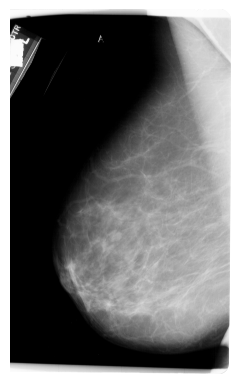

(6871, 4096)


In [ ]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

image_directory = '/content/jpeg/'

folder_path = os.path.join(image_directory, trainFinal['desired_portion'].iloc[80])
image_files = [filename for filename in os.listdir(folder_path) if filename.endswith('.jpg')]
print(image_files)


# Load and display the JPEG image
image_path = os.path.join(folder_path, image_files[0])  # Replace with the path to your image
img = mpimg.imread(image_path)

print("Label: ", trainFinal['pathology'].iloc[88])

# Display the resized image
plt.imshow(img, cmap = 'gray') #colour
plt.axis('off')  # Turn off axes for cleaner display
plt.show()
print(img.shape)


In [ ]:
image_directory = '/content/jpeg/'
output_directory = '/content/train/'

# Loop through the desired_portion values and process images
for desired_portion, pathology in zip(trainFinal['desired_portion'], trainFinal['pathology']):
    folder_path = os.path.join(image_directory, desired_portion)
    image_files = [filename for filename in os.listdir(folder_path) if filename.endswith('.jpg')]

    for image_file in image_files:
        # Load and resize the image
        image_path = os.path.join(folder_path, image_file)
        img = Image.open(image_path)
        new_width = 350
        new_height = 350
        resized_img = img.resize((new_width, new_height))

        # Save the resized image to the output directory with the corresponding pathology label
        output_path = os.path.join(output_directory, pathology, image_file)
        os.makedirs(os.path.dirname(output_path), exist_ok=True)
        resized_img.save(output_path)

print("Images saved to the 'train' folder.")

Images saved to the 'train' folder.


In [ ]:
image_directory = '/content/jpeg/'
output_directory = '/content/test/'

# Loop through the desired_portion values and process images
for desired_portion, pathology in zip(testFinal['desired_portion'], testFinal['pathology']):
    folder_path = os.path.join(image_directory, desired_portion)
    image_files = [filename for filename in os.listdir(folder_path) if filename.endswith('.jpg')]

    for image_file in image_files:
        # Load and resize the image
        image_path = os.path.join(folder_path, image_file)
        img = Image.open(image_path)
        new_width = 350
        new_height = 350
        resized_img = img.resize((new_width, new_height))

        # Save the resized image to the output directory with the corresponding pathology label
        output_path = os.path.join(output_directory, pathology, image_file)
        os.makedirs(os.path.dirname(output_path), exist_ok=True)
        resized_img.save(output_path)

print("Images saved to the 'test' folder.")

Images saved to the 'test' folder.


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path to the main 'train' directory
train_directory = 'train/'  # Replace with the path to your 'train' directory

# Create an ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalize pixel values

# Load images and labels using the ImageDataGenerator
batch_size = 32  # Adjust as needed
image_size = (350, 350)  # Adjust to your desired image dimensions

# Load training data
train_generator = datagen.flow_from_directory(
    train_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # Use 'categorical' for multiple classes
    shuffle=True
    )

# Get data and labels from the generator
train_images, train_labels = [], []
num_batches = len(train_generator)
for _ in range(num_batches):
    data_batch, labels_batch = train_generator.next()
    train_images.append(data_batch)
    train_labels.append(labels_batch)

# Concatenate the batches to create the final NumPy arrays
train_images = np.concatenate(train_images, axis=0)
train_labels = np.concatenate(train_labels, axis=0)

# Print the shapes of the arrays
print("Data shape:", train_images.shape) #unflatted
print("Labels shape:", train_labels.shape) #unflatted

Found 538 images belonging to 2 classes.
Data shape: (538, 350, 350, 3)
Labels shape: (538,)


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path to the main 'test' directory
test_directory = 'test/'  # Replace with the path to your 'test' directory

# Create an ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalize pixel values

# Load images and labels using the ImageDataGenerator
batch_size = 32  # Adjust as needed
image_size = (350, 350)  # Adjust to your desired image dimensions

# Load training data
test_generator = datagen.flow_from_directory(
    test_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # Use 'categorical' for multiple classes
    shuffle=True
    )

# Get data and labels from the generator
test_images, test_labels = [], []
num_batches = len(test_generator)
for _ in range(num_batches):
    data_batch, labels_batch = test_generator.next()
    test_images.append(data_batch)
    test_labels.append(labels_batch)

# Concatenate the batches to create the final NumPy arrays
test_images = np.concatenate(test_images, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

# Print the shapes of the arrays
print("Data shape:", test_images.shape)
print("Labels shape:", test_labels.shape)

Found 288 images belonging to 2 classes.
Data shape: (288, 350, 350, 3)
Labels shape: (288,)


In [ ]:
# creating baseline models
# flattening images

#new variable
trainIMG_baseline = train_images.reshape(len(train_images),-1)
trainLabel_baseline = train_labels

print("Data shape:", trainIMG_baseline.shape)
print("Labels shape:", trainLabel_baseline.shape)

Data shape: (538, 367500)
Labels shape: (538,)


In [ ]:
#new variable
testIMG_baseline = test_images.reshape(len(test_images),-1)
testLabel_baseline = test_labels

print("Data shape:", testIMG_baseline.shape)
print("Labels shape:", testLabel_baseline.shape)

Data shape: (288, 367500)
Labels shape: (288,)


## Baseline Models

In [ ]:
from sklearn.metrics import classification_report



### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

# instantiate the model (using the default parameters)
modell = LogisticRegression(random_state=16)

# fit the model with training data
modell.fit(trainIMG_baseline, trainLabel_baseline)

# predicting using testing data
# asking the computer to predict
y_pred = modell.predict(testIMG_baseline)

# accuracy scoring
print(classification_report(testLabel_baseline, y_pred))


### Ridge Classifier

In [ ]:
# Ridge Classifier
from sklearn.linear_model import RidgeClassifier

from sklearn.metrics import accuracy_score

# instantiate the model (using the default parameters)
model2 = RidgeClassifier(random_state=16)

# fit the model with training data
model2.fit(trainIMG_baseline, trainLabel_baseline)

# predicting using testing data
# asking the computer to predict
y_pred = model2.predict(testIMG_baseline)

# accuracy scoring
print(classification_report(testLabel_baseline, y_pred))


### Random Forest Classifier

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

# instantiate the model (using the default parameters)
model3 = RandomForestClassifier(random_state=16)

# fit the model with training data
model3.fit(trainIMG_baseline, trainLabel_baseline)

# predicting using testing data
# asking the computer to predict
y_pred = model3.predict(testIMG_baseline)

# accuracy scoring
print(classification_report(testLabel_baseline, y_pred))


### Decision Tree Classifier

In [ ]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# instantiate the model (using the default parameters)
model4 = DecisionTreeClassifier(random_state=16)

# fit the model with training data
model4.fit(trainIMG_baseline, trainLabel_baseline)

# predicting using testing data
# asking the computer to predict
y_pred = model4.predict(testIMG_baseline)

# accuracy scoring
print(classification_report(testLabel_baseline, y_pred))


### Support Vector Classifier

In [ ]:
# Support Vector Classifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

# instantiate the model (using the default parameters)
model5 = SVC(random_state=16)

# fit the model with training data
model5.fit(trainIMG_baseline, trainLabel_baseline)

# predicting using testing data
# asking the computer to predict
y_pred = model5.predict(testIMG_baseline)

# accuracy scoring
print(classification_report(testLabel_baseline, y_pred))



### MPLClassifer

In [ ]:
# MLPClassifer

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# instantiate the model (using the default parameters)
model6 = MLPClassifier(random_state=16)

# fit the model with training data
model6.fit(trainIMG_baseline, trainLabel_baseline)

# predicting using testing data
# asking the computer to predict
y_pred = model6.predict(testIMG_baseline)

# accuracy scoring
print(classification_report(testLabel_baseline, y_pred))



## Advanced Models

### Import Packages

In [ ]:
!pip install fastapi
!pip install kaleido
!pip install python-multipart
!pip install uvicorn

import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from collections import Counter
import keras.api._v2.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, InputLayer
from keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape
# from keras.utils.np_utils import to_categorical
!pip install -q git+https://github.com/rdk2132/scikeras # workaround for scikeras deprecation
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


# Quiet deprecation warnings
import warnings
warnings.filterwarnings("ignore")

def CNNClassifier(num_epochs=2, layers=1, dropout=0.15):
  def create_model():
    model = Sequential()
    model.add(Reshape((350, 450, 3)))

    for i in range(layers):
      model.add(Conv2D(32, (3, 3), padding='same'))
      model.add(Activation('relu'))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(2))
    model.add(Activation('softmax'))

    return model
  # initiate RMSprop optimizer
  opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6)
  return KerasClassifier(model=create_model, optimizer=opt, loss='categorical_crossentropy', epochs=num_epochs, batch_size=10, verbose=2, validation_batch_size=10, validation_split=.2, metrics=['accuracy'])


def plot_acc(history, ax = None, xlabel = 'Epoch #'):

    if hasattr(history, 'history_'):
      history = history.history_
    else:
      history = history.history
    history.update({'epoch':list(range(len(history['val_accuracy'])))})
    history = pd.DataFrame.from_dict(history)

    best_epoch = history.sort_values(by = 'val_accuracy', ascending = False).iloc[0]['epoch']

    if not ax:
      f, ax = plt.subplots(1,1)
    sns.lineplot(x = 'epoch', y = 'val_accuracy', data = history, label = 'Validation', ax = ax)
    sns.lineplot(x = 'epoch', y = 'accuracy', data = history, label = 'Training', ax = ax)
    ax.axhline(0.5, linestyle = '--',color='red', label = 'Chance')
    ax.axvline(x = best_epoch, linestyle = '--', color = 'green', label = 'Best Epoch')
    ax.legend(loc = 7)
    ax.set_ylim([0.4, 1])

    ax.set_xlabel(xlabel)
    ax.set_ylabel('Accuracy (Fraction)')

    plt.show()

def model_to_string(model):
    import re
    stringlist = []
    model.summary(print_fn=lambda x: stringlist.append(x))
    sms = "\n".join(stringlist)
    sms = re.sub('_\d\d\d','', sms)
    sms = re.sub('_\d\d','', sms)
    sms = re.sub('_\d','', sms)
    return sms


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.8.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that a

In [ ]:
def categorical_to_numpy(labels_in):
  labels = []
  for label in labels_in:
    if label == 1:
      labels.append(np.array([1, 0]))
    else:
      labels.append(np.array([0, 1]))
  return np.array(labels)

In [ ]:
train_labels = categorical_to_numpy(train_labels)
test_labels = categorical_to_numpy(test_labels)

### Training CNN- Keras Sequental API

In [ ]:
# things to change
# epochs -> higher the number the more accurate but also more likely to overfit
# learning_rate -> keeping this number below 0.005
# number of layers -> both in CNN part and in NN part

#### Model 2

In [ ]:
# 2

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['benign', 'malginant']


model = models.Sequential()
# model.add(layers.Conv2D(84, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(18, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

#CNN layers , layers.Con2D
#NN Layers, dense layers

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=8,
                    validation_data=(test_images, test_labels))


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_6 (Flatten)         (None, 1024)             

#### Model 3

In [ ]:
# 3

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['benign', 'malginant']


model = models.Sequential()

#CNN layers , layers.Con2D
#NN Layers, dense layers

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(72, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 72)          41544     
                                                                 
 flatten_3 (Flatten)         (None, 1152)             

#### Model 4

In [ ]:
# 4

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['benign', 'malginant']


model = models.Sequential()

#CNN layers , layers.Con2D
#NN Layers, dense layers

model.add(layers.Conv2D(52, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(74, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(84, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(68, activation='relu'))
model.add(layers.Dense(10))

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 52)        1456      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 15, 15, 52)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 74)        34706     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 6, 6, 74)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 84)          56028     
                                                                 
 flatten_5 (Flatten)         (None, 1344)             

#### Model 5

In [ ]:
# 5

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['benign', 'malginant']

model = models.Sequential()

#CNN layers , layers.Con2D
#NN Layers, dense layers

model.add(layers.Conv2D(52, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(74, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(84, (3, 3), activation='relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Flatten())
model.add(layers.Dense(68, activation='relu'))
model.add(layers.Dense(10))

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 52)        1456      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 15, 15, 52)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 74)        34706     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 6, 6, 74)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 84)          56028     
                                                                 
 dropout (Dropout)           (None, 4, 4, 84)         

#### Model 6

In [ ]:
# 6 - Testing

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['benign', 'malginant']


model = models.Sequential()

#CNN layers , layers.Con2D
#NN Layers, dense layers

model.add(layers.Conv2D(52, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(74, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(84, (3, 3), activation='relu'))
model.add(layers.Dropout(0.4))
# reducing layers sizes a little bit
#dropout don't go over 0.6
# train for longer , increase epochs to 15

model.add(layers.Flatten())
model.add(layers.Dense(68, activation='relu'))
model.add(layers.Dense(10))


model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=13,
                    validation_data=(test_images, test_labels))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 52)        1456      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 15, 15, 52)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 74)        34706     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 6, 6, 74)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 84)          56028     
                                                                 
 dropout_1 (Dropout)         (None, 4, 4, 84)         

#### Model 7

In [ ]:
# 7

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['benign', 'malginant']


model = models.Sequential()

#CNN layers , layers.Con2D
#NN Layers, dense layers

model.add(layers.Conv2D(52, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(74, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(84, (3, 3), activation='relu'))
model.add(layers.Dropout(0.5))
# reducing layers sizes a little bit
#dropout don't go over 0.6
# train for longer , increase epochs to 15

model.add(layers.Flatten())
model.add(layers.Dense(68, activation='relu'))
model.add(layers.Dense(10))


model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=14,
                    validation_data=(test_images, test_labels))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 52)        1456      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 52)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 74)        34706     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 74)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 84)          56028     
                                                                 
 dropout (Dropout)           (None, 4, 4, 84)          0

#### Model 9

In [ ]:
# 9 - Testing
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, # 15; accuracy: 0.9118 - val_loss: 1.3242 - val_accuracy: 0.7169
                    validation_data=(test_images, test_labels))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization_3 (Bat  (None, 30, 30, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 batch_normalization_4 (Bat  (None, 13, 13, 128)       512       
 chNormalization)                                                
                                                      

#### Model 10

In [ ]:
# 10 - Testing
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=30, # 15; accuracy: 0.9118 - val_loss: 1.3242 - val_accuracy: 0.7169
                    validation_data=(test_images, test_labels))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization_6 (Bat  (None, 30, 30, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 batch_normalization_7 (Bat  (None, 13, 13, 128)       512       
 chNormalization)                                                
                                                      

#### Model 11

In [ ]:
# 11 - Testing
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=46,
                    validation_data=(test_images, test_labels))

KeyboardInterrupt: ignored

#### Model 12

In [ ]:
# 12 - Testing
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=138,
                    validation_data=(test_images, test_labels))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization_24 (Ba  (None, 30, 30, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 15, 15, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 batch_normalization_25 (Ba  (None, 13, 13, 128)       512       
 tchNormalization)                                               
                                                      

#### Model 13

In [ ]:
# 13 - Testing
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=54,
                    validation_data=(test_images, test_labels))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization_18 (Ba  (None, 30, 30, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 15, 15, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 batch_normalization_19 (Ba  (None, 13, 13, 128)       512       
 tchNormalization)                                               
                                                      

### Table for accuracy

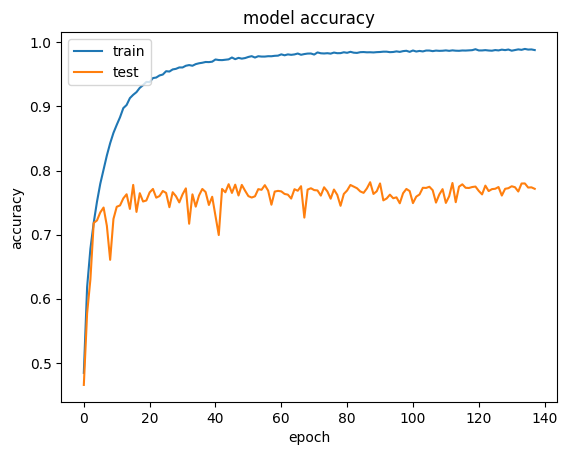

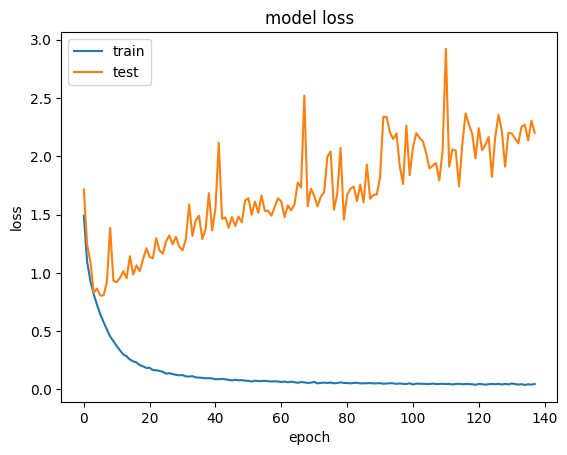

In [ ]:
# summarize history for accuracy

# Visualize training history
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Confusion Matrix

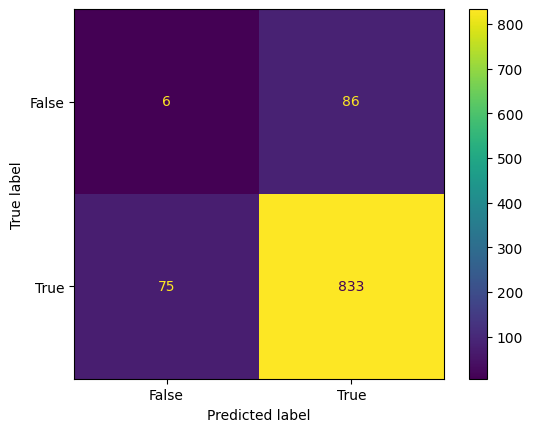

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### Testing Project 1

#### Model 1



In [ ]:
# initialize a new Sequential
model = Sequential()
model.add(Reshape((350, 350, 3)))

# CNN Layers

# 1)
# always want to have an activation layer after a conv2d layer
model.add(Conv2D(2, (3, 3), padding='same'))
model.add(Activation('relu'))

# 2)
# optional - after conv2d + activation layer - can include either MaxPooling2D or Dropout or both
# MaxPooling2D - reducing the dimensions of your image - helps speed up the training process - helps reduce overfitting
# Dropout Layers - also help reduce overfitting (0 - 1) (ideally it is less than 0.5 and above 0.2)

model.add(Conv2D(1, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2)) #good for overfitting

## NN Layers

model.add(Flatten())

#1)
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5)) # optional

# 2)
model.add(Dense(4))
model.add(Activation('relu'))

# Output Layer
# model.add(Dense(3))
# model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.002, decay=1e-6)

# Let's train the model using RMSprop, adam
model.compile(loss='categorical_crossentropy',
              optimizer=opt, #adam
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=6,
                  validation_data=(test_images, test_labels))

# opt --> optimizer
# opt=adam

#opt and 8 epochs is val accuracy: 58%
# adam and 8 epochs the val accuravy stayed the same at 46%


NameError: ignored

#### Model 2


In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, Reshape

# initialize a new Sequential
model = Sequential()
model.add(Reshape((340, 350, 3)))

# CNN Layers

# 1)
model.add(Conv2D(32, (5, 5), padding='same'))
model.add(Activation('relu'))

# 2)
# optional - after conv2d + activation layer - can include either MaxPooling2D or Dropout or both
# MaxPooling2D - reducing the dimensions of your image - helps speed up the training process - helps reduce overfitting
# Dropout Layers - also help reduce overfitting (0 - 1) (ideally it is less than 0.5 and above 0.2)
model.add(Conv2D(42, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# 3)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

#4 )
model.add(Conv2D(17, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# #5)
# model.add(Conv2D(10, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))


## NN Layers
model.add(Flatten())

# 1)
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5)) # optional

# 2)
model.add(Dense(256))
model.add(Activation('relu'))

# 3)
# model.add(Dense(120))
# model.add(Activation('relu'))

# Output Layer - keep as is
model.add(Dense(2))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=13,
                  validation_data=(test_images, test_labels))

#### Model 3

In [ ]:
# initialize a new Sequential
model = Sequential()
model.add(Reshape((200, 300, 3)))

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

datagen.fit(train_images)

# CNN Layers

# 1)
model.add(Conv2D(32, (5, 5), padding='same'))
model.add(Activation('relu'))

# 2)
# optional - after conv2d + activation layer - can include either MaxPooling2D or Dropout or both
# MaxPooling2D - reducing the dimensions of your image - helps speed up the training process - helps reduce overfitting
# Dropout Layers - also help reduce overfitting (0 - 1) (ideally it is less than 0.5 and above 0.2)
model.add(Conv2D(42, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

#3 )
model.add(Conv2D(18, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

#4)
model.add(Conv2D(10, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))


## NN Layers
model.add(Flatten())

# 1)
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3)) # optional

# 2)
model.add(Dense(256))
model.add(Activation('relu'))

# Output Layer - keep as is
model.add(Dense(2))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0002, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=32,
                  validation_data=(test_images, test_labels))

#### Model 4

In [ ]:
# Import necessary libraries
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, Reshape

# Load your data (train_images, train_labels, test_images, test_labels) here

# Data preprocessing: Normalize pixel values to have a mean of 0 and standard deviation of 1
train_images = (train_images - np.mean(train_images)) / np.std(train_images)
test_images = (test_images - np.mean(test_images)) / np.std(test_images)

# Initialize a new Sequential model
model = Sequential()
model.add(Reshape((350, 450, 3)))

# Convolutional Layers
model.add(Conv2D(32, (5, 5), padding='same', activation='relu'))
model.add(Conv2D(42, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(18, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(10, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))

# Output Layer
model.add(Dense(2, activation='softmax'))

# Choose an appropriate optimizer (e.g., Adam) and compile the model
opt = keras.optimizers.Adam(learning_rate=0.0003)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Train the model with early stopping based on validation loss
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

history = model.fit(train_images, train_labels, epochs=100,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping])

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


#### Model 5

In [ ]:
# initialize a new Sequential
model = Sequential()
model.add(Reshape((350, 450, 3)))

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

datagen.fit(train_images)

# CNN Layers

# 1)
model.add(Conv2D(32, (5, 5), padding='same'))
model.add(Activation('relu'))

# 2)
# optional - after conv2d + activation layer - can include either MaxPooling2D or Dropout or both
# MaxPooling2D - reducing the dimensions of your image - helps speed up the training process - helps reduce overfitting
# Dropout Layers - also help reduce overfitting (0 - 1) (ideally it is less than 0.5 and above 0.2)

#3 )
model.add(Conv2D(15, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

#4)
model.add(Conv2D(10, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))


## NN Layers
model.add(Flatten())

# 1)
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3)) # optional

# 2)
model.add(Dense(256))
model.add(Activation('relu'))

# Output Layer - keep as is
model.add(Dense(2))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0002, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=32,
                  validation_data=(test_images, test_labels))

#### Model 6 (58%)

In [ ]:
# initialize a new Sequential
model = Sequential()
model.add(Reshape((350, 450, 3)))

# 1)
# always want to have an activation layer after a conv2d layer
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))

# 2)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))


# 3)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# this model has 3 convolutional layers

## NN Layers

model.add(Flatten())

# 1)
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5)) # optional

# 2)
model.add(Dense(256))
model.add(Activation('relu'))

# Output Layer
model.add(Dense(2))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.008, decay=1e-6) #0.001

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=18,
                  validation_data=(test_images, test_labels))

#### Model 7

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, Reshape
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Model Initialization
model = Sequential()
model.add(Reshape((350, 450, 3)))

# Convolutional Layers
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(24, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the Model
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Data Augmentation for Training
datagen.fit(train_images)

# Train the Model
model.fit(datagen.flow(train_images, train_labels, batch_size=32),
          epochs=8,
          validation_data=(test_images, test_labels))

# Evaluate the Model
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
